<a href="https://colab.research.google.com/github/CivitCihan/BasisML/blob/main/BasisML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dosyanın yolunu belirle
file_path = '/content/drive/My Drive/Hitters.csv'  # Dosyanın tam yolu

# Veriyi oku
df = pd.read_csv(file_path)
# df = df.drop('Unnamed: 0', axis=1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

Ridge Regression

In [ ]:
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
dms.describe().T

,count,unique,top,freq
League_A,263,2,True,139
League_N,263,2,False,139
Division_E,263,2,False,134
Division_W,263,2,True,134
NewLeague_A,263,2,True,141
NewLeague_N,263,2,False,141


In [ ]:
dms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    bool 
 1   League_N     263 non-null    bool 
 2   Division_E   263 non-null    bool 
 3   Division_W   263 non-null    bool 
 4   NewLeague_A  263 non-null    bool 
 5   NewLeague_N  263 non-null    bool 
dtypes: bool(6)
memory usage: 3.6 KB


In [ ]:
X_train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,403.790476,108.123810,11.604762,55.019048,51.671429,40.504762,7.414286,2672.000000,728.590476,68.866667,363.123810,330.961905,255.371429,288.457143,118.261905,8.738095
std,147.747081,45.688815,8.866418,25.610248,26.422617,21.388690,4.757747,2247.600466,642.611690,77.875998,324.465101,316.670657,249.085265,275.838488,145.139342,6.581326
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,284.250000,73.000000,5.000000,33.250000,30.000000,23.000000,4.000000,915.500000,219.250000,16.000000,113.000000,100.000000,78.500000,116.000000,8.000000,4.000000
50%,407.500000,103.500000,9.000000,52.500000,47.000000,36.500000,6.000000,2089.500000,546.500000,40.000000,276.000000,254.000000,176.500000,226.000000,45.500000,7.000000
75%,526.000000,141.000000,18.000000,73.000000,71.750000,56.000000,10.750000,3809.500000,994.750000,92.750000,484.500000,420.000000,320.500000,316.000000,195.500000,13.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,384.000000,2165.000000,1348.000000,1566.000000,1377.000000,492.000000,32.000000


In [ ]:
Y_train.describe()

,Salary
count,210.000000
mean,546.825543
std,449.846212
min,67.500000
25%,200.000000
50%,450.000000
75%,750.000000
max,2460.000000


In [ ]:
ridge_model = Ridge(alpha = 0.2).fit(X_train, Y_train)

In [ ]:
ridge_model

Ridge(alpha=0.2)

In [ ]:
print(ridge_model.coef_)
print(ridge_model.intercept_)

[  -2.20312037    8.10160596    2.63286637   -2.06486353   -2.11814801
    6.26915837   -0.57704697   -0.30884436    0.61327993    2.24572502
    1.44197973    0.27816852   -0.79529304    0.31515557    0.4774912
   -4.39351839   71.37580477 -131.30756584  -70.78829338]
272.0465923562522


In [ ]:
lambdas = 10**np.linspace(10, -2, 100)*0.5
lambdas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge_model = Ridge()
coefs = []

for i in lambdas:
  ridge_model.set_params(alpha = i)
  ridge_model.fit(X_train, Y_train)
  coefs.append(ridge_model.coef_)

In [ ]:
coefs

[array([ 9.52633605e-04,  3.32818230e-04,  5.58937513e-05,  1.81393923e-04,
         2.01002840e-04,  1.60568443e-04,  2.55414271e-05,  1.73269361e-02,
         5.24588646e-03,  7.18926191e-04,  2.77280232e-03,  2.83713359e-03,
         1.85411851e-03,  1.48778555e-03,  3.52157874e-05, -2.89508296e-06,
        -5.79131836e-07, -2.20166148e-06, -5.34366764e-07]),
 array([ 1.24229941e-03,  4.34610501e-04,  7.27139310e-05,  2.37513187e-04,
         2.61392125e-04,  2.09179777e-04,  3.11766976e-05,  2.15513660e-02,
         6.54910421e-03,  9.12508164e-04,  3.47312686e-03,  3.56921236e-03,
         2.31571423e-03,  1.95842907e-03,  4.68102518e-05, -3.59337546e-06,
        -7.63918825e-07, -2.90523232e-06, -7.06679067e-07]),
 array([ 1.61609915e-03,  5.66307710e-04,  9.43227955e-05,  3.10475430e-04,
         3.38919513e-04,  2.71799334e-04,  3.72622401e-05,  2.64216162e-02,
         8.06840986e-03,  1.14841246e-03,  4.29742626e-03,  4.44127701e-03,
         2.85453464e-03,  2.57573586e-03, 

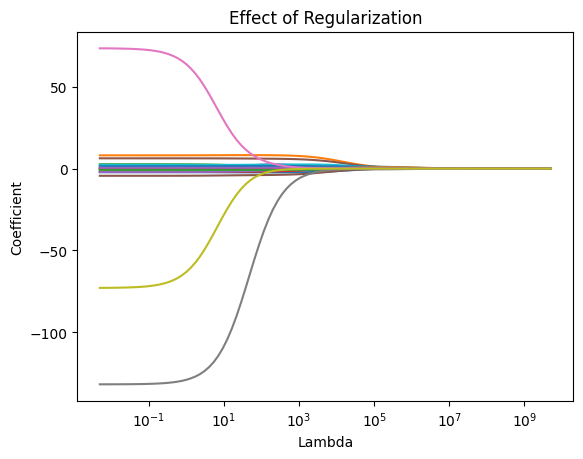

In [ ]:
chart = plt.gca()
plt.plot(lambdas, coefs)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient')
plt.title('Effect of Regularization')
plt.axis('tight')
plt.show()

Lasso Regression

In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
df.shape

(263, 20)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [ ]:
lasso_model = Lasso().fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.561e+06, tolerance: 3.886e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print("Coef Values")
print(lasso_model.coef_)
print("Intercept Value")
print(lasso_model.intercept_)

Coef Values
[ -2.01674177   6.9697757    6.78881828  -1.2364626   -2.05958292
   6.28639092   2.83196597  -0.16122132   0.17580088  -0.23909311
   1.44744196   0.6574056   -1.0253628    0.40013782   0.40541544
  -2.57597836  33.82847056 -90.32334601  13.4433423 ]
Intercept Value
135.742179276846


In [ ]:
lambdas2 =np.random.randint(0, 1000, 10)
lambdas2

array([189, 707, 558, 929, 431, 370,  64,  11, 857, 904])

In [ ]:
lasso = Lasso()
coefs = []

for a in lambdas2:
  lasso.set_params(alpha = a)
  lasso.fit(X_train, Y_train)
  coefs.append(lasso.coef_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.469e+03, tolerance: 3.886e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.801e+03, tolerance: 3.886e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e+04, tolerance: 3.886e

<function matplotlib.pyplot.show(close=None, block=None)>

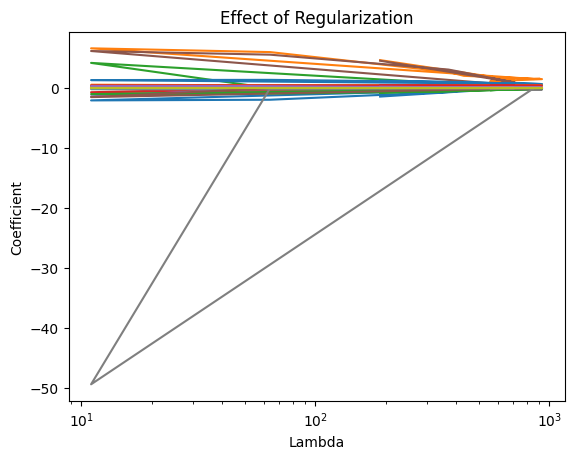

In [ ]:
aplt = plt.gca()
plt.plot(lambdas2, coefs)
aplt.set_xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient')
plt.title('Effect of Regularization')
plt.axis('tight')
plt.show

In [ ]:
lasso_model.predict(X_train[0:10])

array([1630.27433066,  699.72934926,  419.33935904,  392.44464447,
         82.86177815,  354.33888689,  696.33946993,  330.65761963,
        427.17759416,  498.84916732])

In [ ]:
lasso_model.predict(X_test[0:10])

array([344.26292629, 176.1708425 , 373.48317281, 358.10980638,
       530.42006923,  31.63474265, 889.67337638, 581.57633949,
       295.28056746, 654.54748837])

In [ ]:
y_pred = lasso_model.predict(X_test)

In [ ]:
mseLasso = mean_squared_error(Y_test, y_pred)
mseLasso

109199.57431755276

In [ ]:
rMseLasso = np.sqrt(mean_squared_error(Y_test, y_pred))
rMseLasso

330.4535887496953

In [ ]:
r2_score(Y_test, y_pred)

0.5926388618849707

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ElasticNet Regression

In [ ]:
enet_model = ElasticNet().fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.767e+06, tolerance: 3.886e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(enet_model.coef_)
print(enet_model.intercept_)

[ -2.08318644   7.08426736   5.83681455  -1.00551059  -1.84865724
   6.29025957   3.35898394  -0.1678994    0.15969291  -0.20871504
   1.52065172   0.63449959  -1.01153054   0.40742623   0.39310983
  -2.08529324  11.81028046 -29.2818219   11.87025153]
113.94489486386527


In [ ]:
enet_model.predict(X_train[0:10])

array([1617.65806129,  678.3645966 ,  397.14387876,  348.00989738,
        122.48859449,  311.84574898,  743.03578088,  291.07170957,
        390.36526208,  477.54975296])

In [ ]:
enet_model.predict(X_test[0:10])

array([295.80004998, 117.85746744, 399.05394011, 402.36959212,
       546.29465307,  59.19716631, 841.4829158 , 531.6933162 ,
       272.79027298, 684.06324093])

In [ ]:
y_pred = enet_model.predict(X_test)

In [ ]:
mseEnet = mean_squared_error(Y_test, y_pred)
mseEnet

113870.05221412136

In [ ]:
rMseEnet = np.sqrt(mean_squared_error(Y_test, y_pred))
rMseEnet

337.44636938945035

In [ ]:
r2_score(Y_test, y_pred)

0.5752159808583964

In [ ]:
EnetCVModel = ElasticNetCV(cv=10).fit(X_train, Y_train)

In [ ]:
print(EnetCVModel.alpha_)
print(EnetCVModel.intercept_)
print(EnetCVModel.coef_)

928.3041874909297
48.30751207379569
[ 0.09527494  0.83946607  0.          0.29609845  0.          0.69169915
  0.         -0.26627846  0.70994798  0.          0.75995995  0.46613068
 -0.21813518  0.40874571  0.1235203  -0.          0.         -0.
  0.        ]


In [ ]:
Enet_tunned = ElasticNet(alpha = EnetCVModel.alpha_).fit(X_train, Y_train)

In [ ]:
Enet_tunned.predict(X_train[0:10])

array([1438.50694577,  748.27046644,  367.25388334,  348.6273747 ,
        177.27937641,  487.41783981,  563.54250822,  232.95232705,
        281.88236476,  604.37780731])

In [ ]:
mseTunnedEnet = mean_squared_error(Y_test, y_pred)
mseTunnedEnet

113870.05221412136

In [ ]:
rMseTunnedEnet = np.sqrt(mean_squared_error(Y_test, y_pred))
rMseTunnedEnet

337.44636938945035

In [ ]:
r2 = r2_score(Y_test, y_pred)
r2

0.5752159808583964